In [1]:
import qiskit
qiskit.__version__

'1.2.1'

In [2]:
import numpy as np
# Importing standard Qiskit libralies
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

{'000': 737, '001': 71, '010': 84, '110': 7, '100': 86, '101': 5, '011': 9, '111': 1}


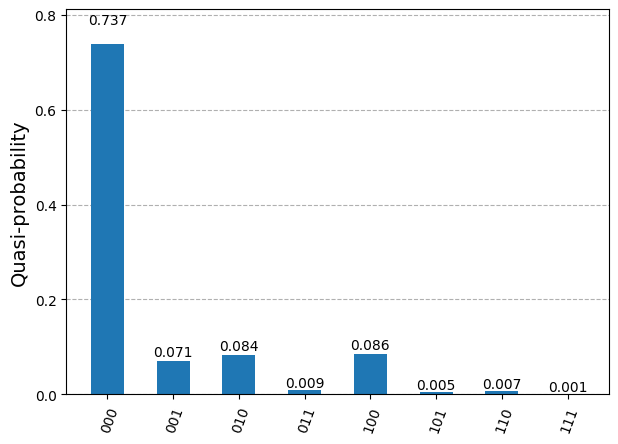

In [3]:
# 量子回路の初期化
circuit = QuantumCircuit(3,3)

# 量子状態を反復
circuit.cx(0,[1,2])
circuit.barrier()

# エラー発生
circuit.rx(np.arccos(4/5) ,[0, 1, 2])

# 測定
circuit.measure([0,1,2],[0,1,2])
circuit.draw("mpl")

# 実行と結果取得
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(circuit)

sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1000)
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_distribution(counts)